This notebook analyses the evolution and fitness of the evolved populations.

In [1]:
BaseDirectory = "BASE//PATH//TO//ReferComm"
import os
os.chdir(BaseDirectory)

import numpy as np
import matplotlib.pyplot as plt

import DataHandler
import importlib
importlib.reload(DataHandler)

from DataHandler import *

# Success Rate

Percent Success for 2-Post Task

In [2]:
# collecting robust performance for every population

os.chdir(BaseDirectory)
os.chdir("./AllData")

perf_low = []
perf_avg = []
tot = 0
tot75 = 0
for batch in range(1,7):
    os.chdir("./EvoP2_"+str(batch))
    if batch == 4: size = 16
    else: size = 32
    for a in range(size):
        tot += 1
        os.chdir("./Pop-"+str(a+1)+"/robust")
        fit = np.loadtxt("RPF-01.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
        perf_low.append(fit[0])
        perf_avg.append(fit[1])
        if fit[1] == 0.75: tot75 += 1
        os.chdir("../../")
    os.chdir("../")

os.chdir(BaseDirectory)
print("total number of populations:", tot)
print("total agents with fitness 0.75:", tot75)

total number of populations: 176
total agents with fitness 0.75: 104


In [3]:
# calculating success rate
good = list(filter(lambda x: x>=.96,perf_avg))
rate = len(good) / tot
rate75 = tot75 / tot
print("total number of successful populations:",len(good))
print("success rate:", rate)
print("0.75 rate:", rate75)

total number of successful populations: 16
success rate: 0.09090909090909091
0.75 rate: 0.5909090909090909


Visualizing Performance Distribution in the 2-Post Task

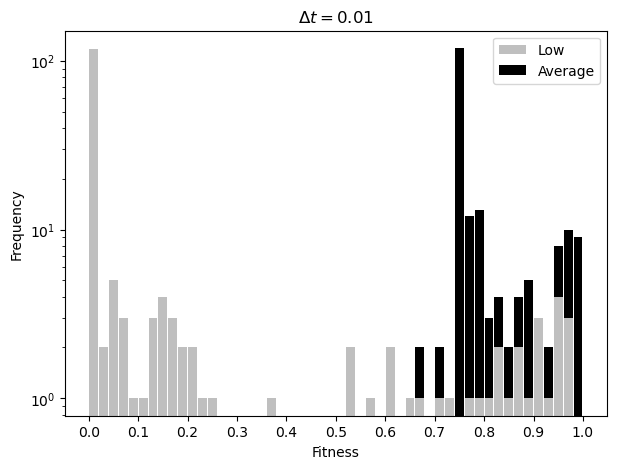

In [4]:
fig,ax = plt.subplots(1,1,figsize=(7,5),sharey="all",sharex="all")

ax.hist([perf_low,perf_avg],bins=50,range=(0,1),density=False,log=True,
            align="mid",color=[".75","0"],rwidth=.9,
            histtype="barstacked",label=["Low","Average"])
ax.set_xticks(np.arange(0,1.1,.1))

ax.set_title("$\Delta t = 0.01$",fontsize=12)
ax.set_xlabel("Fitness",fontsize=10)
ax.set_ylabel("Frequency",fontsize=10)
ax.legend(loc="upper right")

fig.subplots_adjust(hspace=0.25)

# os.chdir(BaseDirectory)
# # fig.savefig('./Plots/P2-histograms.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-histograms.jpeg',bbox_inches="tight",dpi=600)
plt.show()

In [5]:
# associating performance to population array
def in_bin (xval,yval,x,y,binsize):
    return (x*binsize <= xval and xval < (x+1)*binsize and
            y*binsize <= yval  and yval < (y+1)*binsize)

binsize = .02
bins = int(1/binsize)
perf = np.zeros((bins,bins),dtype=int)
for avg in range(bins):
    for low in range(bins):
        for i in range(176):
            if in_bin(perf_avg[i],perf_low[i],avg,low,binsize):
                perf[avg,low] += 1

perf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 3, 0]])

In [6]:
# for reference after shrinking in next cell
perf[int(.75/binsize),0]

117

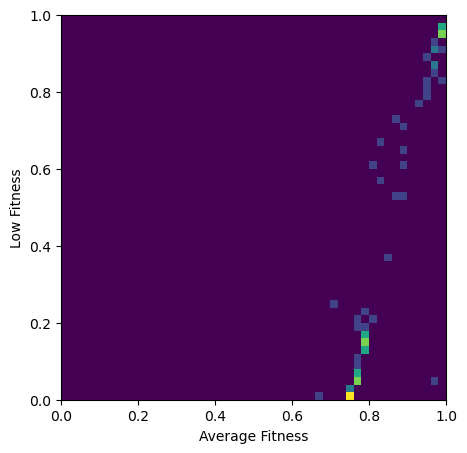

In [7]:
# heatmap of fitness distribution

# needs to be shrunk in order to see other bins
perf[int(.75/binsize),0] = 5

fig = plt.figure(figsize=(5,5))
ax = fig.add_gridspec().subplots()
ax.set(aspect=1)
im = ax.imshow(np.flipud(perf.transpose()),extent=[0,1,0,1])

ax.set_xlabel("Average Fitness")
ax.set_ylabel("Low Fitness")

plt.show()

Performance of Nine Unique Solutions

In [8]:
# reading in performance data
os.chdir(BaseDirectory)
os.chdir("./EvoP2")

# array of robust low, roubst avg, avg
unq_perf = np.empty((9,4),dtype=float)
for a in range(9):
    os.chdir("Pop-"+str(a+1))
    unq_perf[a,0] = a+1
    unq_perf[a,1:3] = np.loadtxt("./robust/RPF-01.dat",
        dtype=float,delimiter=" ",skiprows=32,max_rows=1)
    unq_perf[a,3] = np.loadtxt("./record/PF.dat",
        dtype=float,delimiter=" ",skiprows=1,max_rows=1)
    os.chdir("../")

os.chdir(BaseDirectory)
print(unq_perf)

[[1.        0.879773  0.971362  0.971658 ]
 [2.        0.0402298 0.97387   0.991854 ]
 [3.        0.964546  0.991029  0.991217 ]
 [4.        0.92365   0.979257  0.980026 ]
 [5.        0.872951  0.968746  0.968392 ]
 [6.        0.960445  0.992035  0.992161 ]
 [7.        0.959901  0.990739  0.990773 ]
 [8.        0.956803  0.984618  0.98482  ]
 [9.        0.974329  0.990614  0.990595 ]]


Robustness of Nine Unique Solutions

In [9]:
# reading data
os.chdir(BaseDirectory)
os.chdir("EvoP2")
r_fit = []
for a in range(9):
    os.chdir("./Pop-"+str(a+1)+"/robust")
    fit = np.loadtxt("RPF-Full.dat",delimiter=" ")
    r_fit.append(np.flipud(fit.transpose()))
    os.chdir("../../")

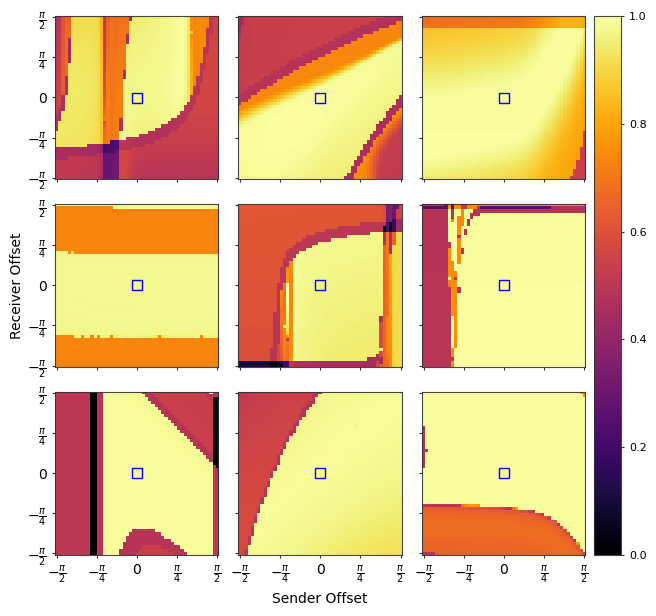

In [10]:
# plotting heatmaps
fig, axs = plt.subplots(3,3,sharex="col",sharey="row",figsize=(10,7))


i = 0
for ax in axs.ravel():
    im = ax.imshow(r_fit[i],extent=[-25.5,25.5,-25.5,25.5],vmin=0,vmax=1,cmap='inferno')
    ax.plot()
    # box indicaed evolved range (~0.4% of the space)
    ax.add_patch(plt.Rectangle((-25/16,-25/16),50/16,50/16,fc="none",edgecolor=[0,0,1]))
    ax.set_xlim([-25.5,25.5])
    ax.set_xticks(np.linspace(-25,25.1,5),
        labels=["$-\\frac{\pi}{2}$","$-\\frac{\pi}{4}$",0,
                "$\\frac{\pi}{4}$","$\\frac{\pi}{2}$"],
        fontsize=10
    )
    ax.set_ylim([-25.5,25.5])
    ax.set_yticks(np.linspace(-25,25.1,5),
        labels=["$-\\frac{\pi}{2}$","$-\\frac{\pi}{4}$",0,
                "$\\frac{\pi}{4}$","$\\frac{\pi}{2}$"],
        fontsize=10
    )
    ax.tick_params(length=2.5,color=".2")
    for spine in ax.spines.values():
        spine.set(alpha=.9,ec='.2')
    
    i += 1
    continue

cb = fig.colorbar(im,ax=axs,fraction=.1,anchor=(1.7,0))
cb.ax.tick_params(labelsize=8,length=2.5,color=".2")
for spine in cb.ax.spines.values():
    spine.set(alpha=.9,ec='.2')

axs[1,0].set_ylabel("Receiver Offset",labelpad=2)
axs[2,1].set_xlabel("Sender Offset",labelpad=5)

fig.subplots_adjust(hspace=.15,wspace=-.55)

# os.chdir(BaseDirectory)
# fig.savefig(fname="./Plots/Gaul.fig3.pdf",format="pdf",bbox_inches='tight',dpi=600)
# fig.savefig(fname="./Plots/robust_heatmaps.jpeg",bbox_inches='tight',dpi=600)
plt.show()

Performance Histogram for 3-Post Task

In [11]:
# Data for 30,000 generation batch
fit0_avg = []
fit0_low = []

os.chdir(BaseDirectory)
os.chdir("./AllData/EvoP3_0")

batchsize = 32
for i in range(batchsize):
    os.chdir("./Pop-"+str(i+1)+"/robust")
    fit = np.loadtxt("P3-RPF-01.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
    fit0_low.append(fit[0])
    fit0_avg.append(fit[1])
    os.chdir("../../")

# Data for 60,000 generation batch
fit1_avg = []
fit1_low = []

os.chdir(BaseDirectory)
os.chdir("./AllData/EvoP3_1")

batchsize = 32
for i in range(batchsize):
    os.chdir("./Pop-"+str(i+1)+"/robust")
    fit = np.loadtxt("P3-RPF-01.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
    fit1_low.append(fit[0])
    fit1_avg.append(fit[1])
    os.chdir("../../")

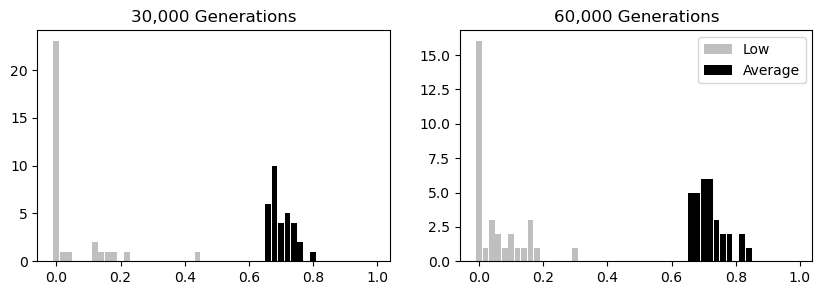

In [12]:
# histograms for two P3 batches

fig,axs = plt.subplots(1,2,figsize=(10,3))

axs[0].hist([fit0_low,fit0_avg],bins=50,range=(0,1),density=False,log=False,
            align="left",color=[".75","0"],histtype="barstacked",rwidth=.9,label=["Low","Average"])
axs[0].set_title("30,000 Generations")
axs[1].hist([fit1_low,fit1_avg],bins=50,range=(0,1),density=False,log=False,
            align="left",color=[".75","0"],histtype="barstacked",rwidth=.9,label=["Low","Average"])
axs[1].set_title("60,000 Generations")

axs[1].legend()

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P3-hist-60000.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P3-hist-60000.jpeg',bbox_inches="tight",dpi=600)
plt.show()

Performance of best agent in 3-post task

In [13]:
idx = np.where(fit1_avg==max(fit1_avg))[0][0] + 1

os.chdir(BaseDirectory)
os.chdir("./AllData/EvoP3_1/Pop-"+str(idx))
robust = np.loadtxt("./robust/P3-RPF-01.dat",
    dtype=float,delimiter=" ",skiprows=32,max_rows=1)
avgfit = np.loadtxt("./record/PF.dat",
    dtype=float,delimiter=" ",skiprows=1,max_rows=1)
os.chdir(BaseDirectory)

print("Population "+str(idx))
print("robust low:",robust[0])
print("robust avg:",robust[1])
print("avg:",avgfit)

Population 22
robust low: 0.100104
robust avg: 0.850866
avg: 0.850866


# Evolution

Evolution Time Series for Unique Solutions

In [14]:
# loading data
# this cell takes ~20s to evaluate
unq = []
for a in range(9):
    unq.append(Data(BaseDirectory,maxP=2,popidx=a+1,perm=[0]))

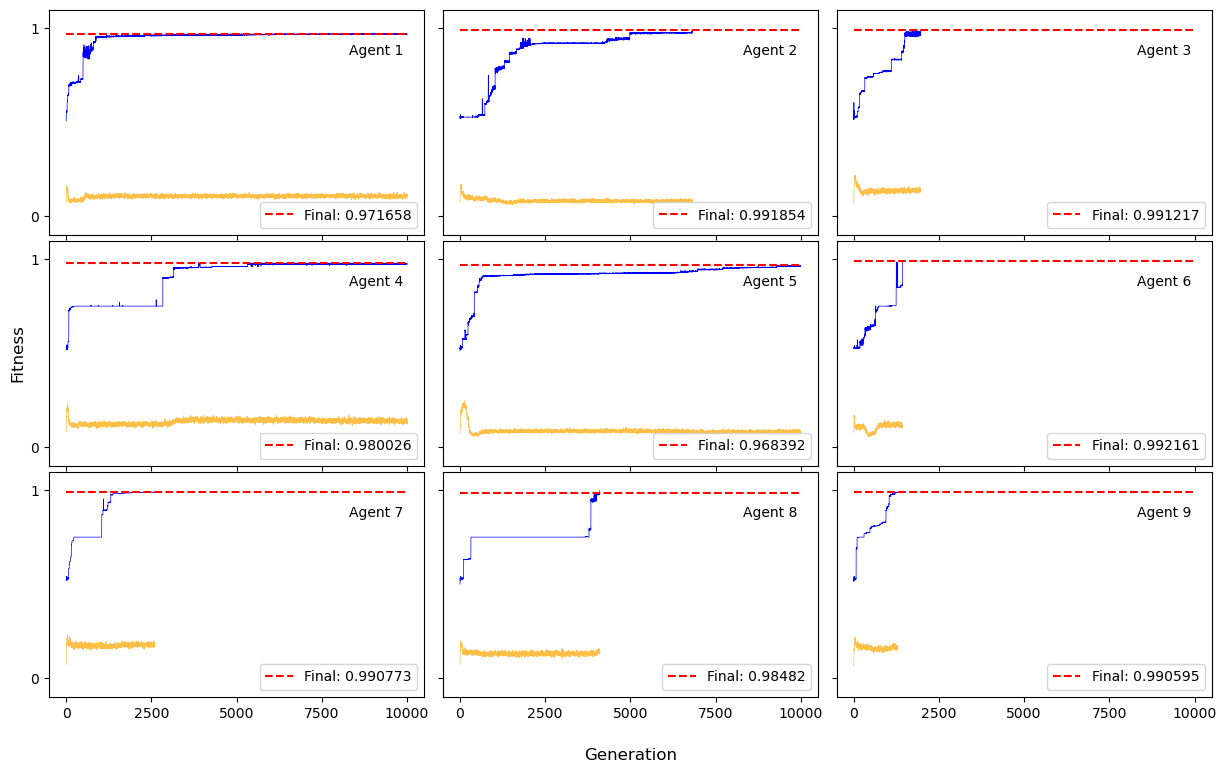

In [15]:
fig, axs = plt.subplots(3,3,figsize=(15,10),sharey="all",sharex="all")
bbox = dict(boxstyle='round',fc='1',edgecolor='1',alpha=1)

i=1
for ax in np.ravel(axs):
    ax = unq[i-1].PlotEvo(ax,mark=True,leg=False)
    ax.set_box_aspect(aspect=.6)
    # legend handle for final fitness value
    h,l = ax.get_legend_handles_labels()
    ax.legend(handles=[h[2]],fontsize=10,loc="lower right")
    ax.text(.8,.8,"Agent "+str(i),transform=ax.transAxes,bbox=bbox)
    i += 1

axs[1,0].set_ylabel("Fitness",fontsize=12)
axs[0,0].set_yticks([0,1])
axs[0,0].set_ylim([-.1,1.1])
axs[0,0].set_xticks(np.arange(0,10001,2500))
axs[2,1].set_xlabel("Generation",fontsize=12,labelpad=20)

plt.subplots_adjust(hspace=-.25,wspace=.05)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-histograms.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-evo-timeseries.jpeg',bbox_inches="tight",dpi=600)
# os.chdir(BaseDirectory)
plt.show()